In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [9]:
# define constants
mu1 = 0 
sigma1 = 1


# calculate the z-transform
z1 = 0.5
z2 = 10

In [10]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,mu1,sigma1)
y2 = norm.pdf(x_all,mu1,sigma1)

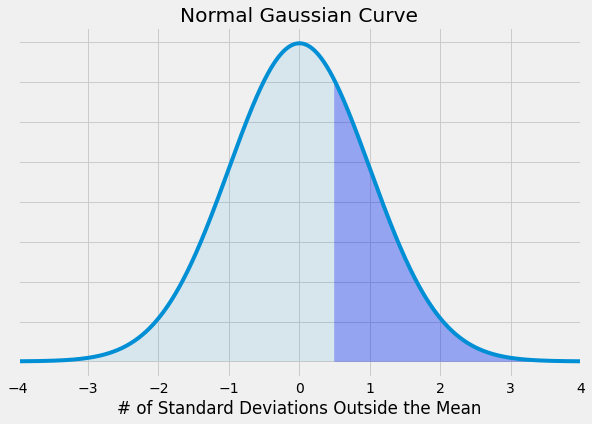

In [11]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [5]:
%matplotlib inline

Teoría de Decisión Bayesiana
===


# Decisión Bayesiana  -  Estimador óptimo.

La definición del umbral de decisión ($\delta$) depende, principalmente, del problema que se esté abordando. Pero definido un estimador, es válida la pregunta sobre cuál es el umbral óptimo de decisión.

Habiendo definido oportunamente:

$$\begin{array}\\
\mathcal{H}_0: & la \; clase \; es \; y =-1 \\
\mathcal{H}_1: & la \; clase \; es \; y =1 
\end{array}
$$

y suponiendo que se conocen las probabilidades $P(\mathcal{H}_1 \mid X)$ y $P(\mathcal{H}_0 \mid X)$, las cuales me indican la probabilidad de que pertenezca a cada clase una muestra $X \in \mathcal{X}$, es directo definir la política de decisión sobre a qué clase pertenece una muestra $X$:


$$\begin{array}\\
Se\;elige \; \mathcal{H}_0 & si &  P(\mathcal{H}_0 \mid X) >  P(\mathcal{H}_1 \mid X)\\
Se\;elige \; \mathcal{H}_1 & si &  P(\mathcal{H}_1 \mid X) >  P(\mathcal{H}_0 \mid X)\\ 
\end{array}
$$

de forma más resumida, escribimos lo anterior como sigue

$$ P(\mathcal{H}_0 \mid X) \mathop{\gtrless}\limits_{\mathcal{H}_1}^{\mathcal{H}_0} P(\mathcal{H}_1 \mid X)$$

El problema radica en que estas probabilidades no se conocen, puesto que es posible conocer todos los posibles datos $X$,ya que el Corpus es un subconjunto de los posibles eventos. No obstante, aplicando el **Teorema de Bayes** la ecuación anterior se puede escribir como:

$$P( \mathcal{H}_0) \; P(X \mid \mathcal{H}_0) \mathop{\gtrless}\limits_{\mathcal{H}_1}^{\mathcal{H}_0} P( \mathcal{H}_1) \; P(X \mid \mathcal{H}_1)$$

donde estas probabilidades pueden estimarse a partir del Corpus de datos $\mathcal{X}$.

Si el corpus es representativo del espacio muestral, entonces a partir de $X \in \mathcal{X}$ y sus categorías $y \in \mathcal{Y}$ se pueden estimar las probabilidades $P(\mathcal{H}_0)$ contando la cantidad de elementos de la categoría $y=-1$, igualmente $P(\mathcal{H}_0)$ para la categoría $y=1$.

Esta estimación es muy dependiente del diseño del corpus, y por lo tanto suelen ser equiprobables, No obstante, una vez puesto el estimador en producción, puede variar. Por ejemplo, si el estimador es parte de una alarma, el corpus puede mostrar equiprobabilidad, cuando la realidad es diferente. 

Por otra parte, conociendo el conjunto de datos, $\mathcal{X}$ y el conjunto de clasificación de los datos, $\mathcal{Y}$,  se pueden considerar conocidas las probabilidades condicionales $P(X / \mathcal{H}_0)$ y $P(X / \mathcal{H}_1)$. Aquí la estimación depende de cuán bien representado esté en $\mathcal{X}$ el espacio muestral.  

Para evitar ese problema, se puede estimar a partir de un modelo de distribución de probabilida. Uno muy útil, puede ser considerar una distribución Gaussiana:

$$\begin{array}\\
P(X / \mathcal{H}_0): \mathcal{N}(\mu_0, \Sigma_0) & \rightarrow & f_{X/\mathcal{H}_0}(x) = \frac{1}{(2\pi)^\frac{n}{2} |\Sigma_0|^\frac{1}{2}} e^{-\frac{1}{2} (x-\mu_0)^T \Sigma_0^{-1} (x-\mu_0)}\\
P(X / \mathcal{H}_1): \mathcal{N}(\mu_1, \Sigma_1) & \rightarrow & f_{X/\mathcal{H}_1}(x) = \frac{1}{(2\pi)^\frac{n}{2} |\Sigma_1|^\frac{1}{2}} e^{-\frac{1}{2} (x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)}
\end{array}$$


siendo $\mu_0$, $\Sigma_0$, $\mu_1$, $\Sigma_1$ las medias y matrices de covarianzas para $P(X \mid \mathcal{H}_0)$ y $P(X \mid \mathcal{H}_1)$ respectivamente. **De todas maneras, para distribuciones gaussianas se debe correr un test de normalidad sobre los datos**. Esto último no se va a considerar aquí.

Entonces, volviendo a considerar 


$$P( \mathcal{H}_0) \; P(X \mid \mathcal{H}_0) \mathop{\gtrless}\limits_{\mathcal{H}_1}^{\mathcal{H}_0} P( \mathcal{H}_1) \; P(X \mid \mathcal{H}_1)$$

se tiene también que,


$$ \frac{P(X \mid \mathcal{H}_1)}{P(X \mid \mathcal{H}_0)} \mathop{\gtrless}\limits_{\mathcal{H}_0}^{\mathcal{H}_1}  \frac{P(\mathcal{H}_0)}{P( \mathcal{H}_1)} = \alpha$$


donde denominamos $\alpha\in \mathbb{R}_{\geq 0}$ a la relación entre las probabilidades de las categorías.